# Preparing notebook

In [1]:
import os
import warnings

import numpy as np
np.random.seed(18)
import matplotlib.pyplot as plt

from F4_func_file import *

In [2]:
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=16)

In [3]:
#Defining the percentiles for the upper and lower bound of errorbars
lower_percentile_border = 5
upper_percentile_border = 95

#Were you using all data for Richardson-Lucy algorithm or only the reduced version?
use_all_data = True

## Load previously evaluated results

In [4]:
#Loading the relevant data files obtained from Fig_4_Data_generation and Fig_4_Method_evaluation notebooks
meas_data_in, meas_data_target = Append_measured_data_files()

DAMN_meas_output = np.load("Evaluated_data/DAMN_Measured_data_output.npy")
DAMN_meas_errors = np.load("Evaluated_data/DAMN_Measured_data_errors.npy")
DAMN_sim_errors = np.load("Evaluated_data/DAMN_Simulated_data_errors.npy")

RL_meas_output = np.load("Evaluated_data/RL_Measured_data_output.npy")
RL_meas_errors = np.load("Evaluated_data/RL_Measured_data_errors.npy")
RL_sim_errors = np.load("Evaluated_data/RL_Simulated_data_errors.npy")

### Graph visualization

In [5]:
#Prepare the horizontal axis labels
concentration_axis_sim = np.load("Simulated_data/Simulated_axis_array.npy")
concentration_axis_meas = np.array([50, 70, 97, 135, 187, 259, 360, 500])

if use_all_data:
    RL_concentration_axis_sim = concentration_axis_sim
    RL_concentration_axis_meas = concentration_axis_meas
else:
    RL_concentration_axis_sim = concentration_axis_sim[::4]
    RL_concentration_axis_meas = concentration_axis_meas[:]

In [6]:
#Process the evaluated per-sample errors to get average value and error bars
DAMN_sim_metric_mean = DAMN_sim_errors.mean(axis=-1)
DAMN_sim_metric_LP = np.percentile(DAMN_sim_errors, lower_percentile_border, axis=-1)
DAMN_sim_metric_UP = np.percentile(DAMN_sim_errors, upper_percentile_border, axis=-1)

DAMN_meas_metric_mean = DAMN_meas_errors.mean(axis=-1)
DAMN_meas_metric_LP = np.percentile(DAMN_meas_errors, lower_percentile_border, axis=-1)
DAMN_meas_metric_UP = np.percentile(DAMN_meas_errors, upper_percentile_border, axis=-1)

RL_sim_metric_mean = RL_sim_errors.mean(axis=-1)
RL_sim_metric_LP = np.percentile(RL_sim_errors, lower_percentile_border, axis=-1)
RL_sim_metric_UP = np.percentile(RL_sim_errors, upper_percentile_border, axis=-1)

RL_meas_metric_mean = RL_meas_errors.mean(axis=-1)
RL_meas_metric_LP = np.percentile(RL_meas_errors, lower_percentile_border, axis=-1)
RL_meas_metric_UP = np.percentile(RL_meas_errors, upper_percentile_border, axis=-1)

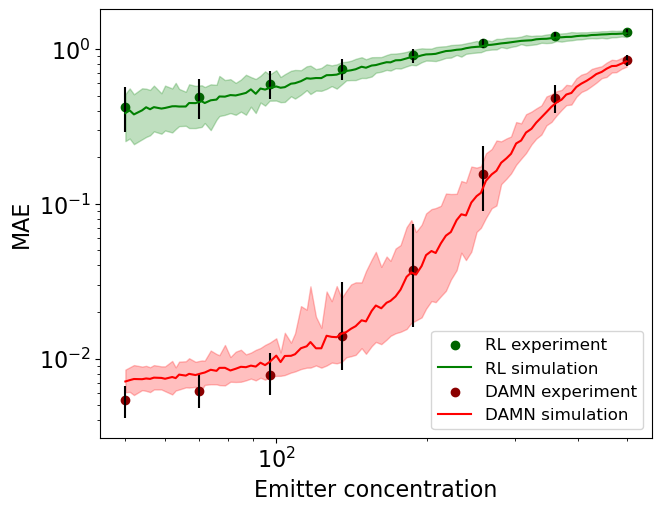

In [7]:
fig, ax = plt.subplots(constrained_layout=True)
fig.set_size_inches(6.5, 5)

#Measured data - error bars
plt.errorbar(concentration_axis_meas, DAMN_meas_metric_mean, 
             yerr=np.array([DAMN_meas_metric_mean-DAMN_meas_metric_LP, DAMN_meas_metric_UP-DAMN_meas_metric_mean]), fmt="None", color="black")
plt.errorbar(RL_concentration_axis_meas, RL_meas_metric_mean, 
             yerr=np.array([RL_meas_metric_mean-RL_meas_metric_LP, RL_meas_metric_UP-RL_meas_metric_mean]), fmt='None', color="black")

#Simulated data - error bars
plt.fill_between(concentration_axis_sim, DAMN_sim_metric_LP, DAMN_sim_metric_UP, color="red", alpha=0.25)
plt.fill_between(RL_concentration_axis_sim, RL_sim_metric_LP, RL_sim_metric_UP, color="green", alpha=0.25)

#Richardson-Lucy results
plt.scatter(RL_concentration_axis_meas, RL_meas_metric_mean, marker="o", color="darkgreen", label="RL experiment")
plt.plot(RL_concentration_axis_sim, RL_sim_metric_mean, color="green", label="RL simulation")

#DAMN model results
plt.scatter(concentration_axis_meas, DAMN_meas_metric_mean, marker="o", color="darkred", label="DAMN experiment")
plt.plot(concentration_axis_sim, DAMN_sim_metric_mean, color="red", label="DAMN simulation")

plt.xlabel("Emitter concentration")
plt.ylabel("MAE")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

Note: The experiment results should be identical to the publication Figure 4 but simulation results in this graph are a limited version of the publication figure. Only 100 data samples per graph point were generated, as RL algorithm reconstruction of the full 1000 samples per point would take unreasonable amount of time.

### Image visualization (only available if use_all_data = True)

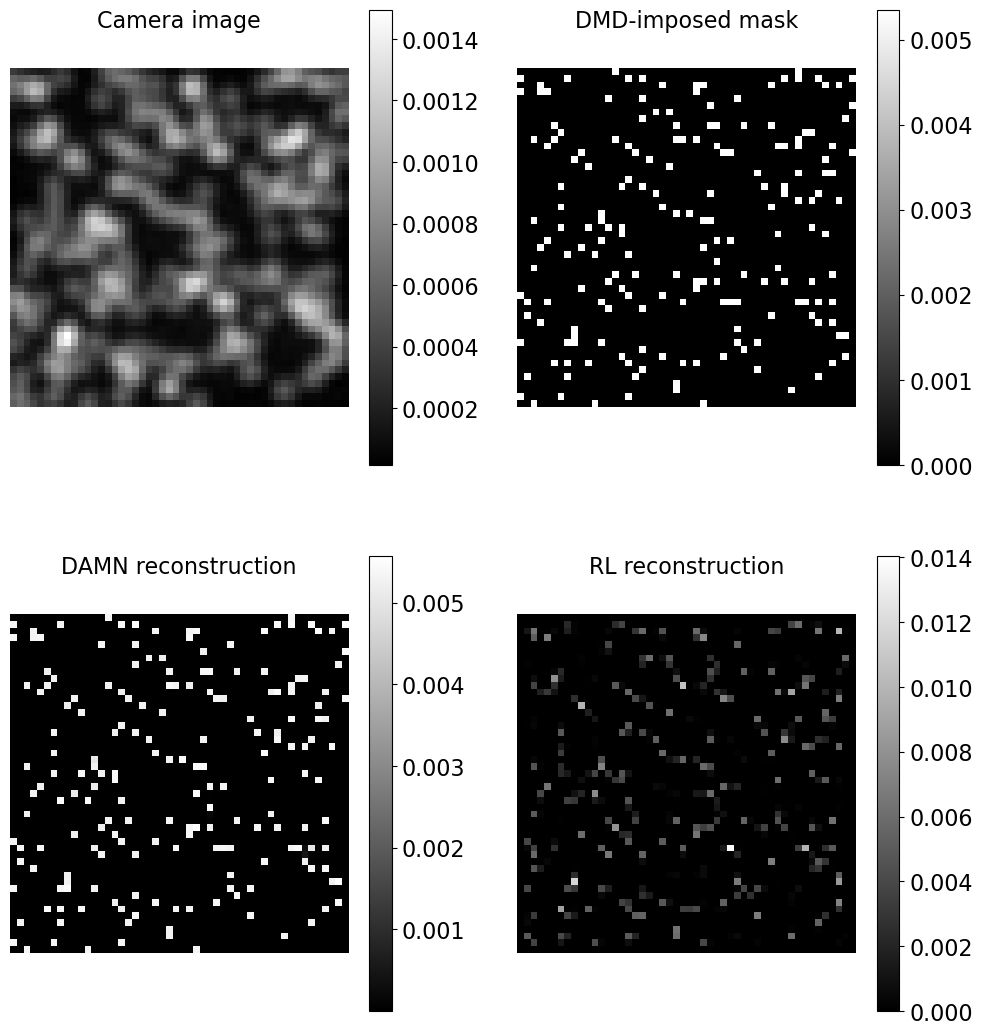

In [8]:
plt.figure(figsize=(12,13))
plt.subplot(221)
plt.matshow(meas_data_in[4,119], cmap="gray", fignum=False)
plt.axis("off")
plt.title("Camera image")
plt.colorbar()

plt.subplot(222)
plt.matshow(meas_data_target[4,119], cmap="gray", fignum=False)
plt.axis("off")
plt.title("DMD-imposed mask")
plt.colorbar()

plt.subplot(223)
plt.matshow(DAMN_meas_output[4,119], cmap="gray", fignum=False)
plt.axis("off")
plt.title("DAMN reconstruction")
plt.colorbar()

if use_all_data:
    plt.subplot(224)
    plt.matshow(RL_meas_output[4,119], cmap="gray", fignum=False)
    plt.axis("off")
    plt.title("RL reconstruction")
    plt.colorbar()
    plt.show()
else:
    warnings.warn("""The RL reconstruction of the publication Figure 4 is available only if "use_all_data" was set to True.""")